In [294]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [295]:
football_players= pd.read_csv("/Users/admin/Downloads/project/machine-learning-project/fifa_players.csv")
football_players

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,release_clause_euro,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Messi,226500000.0,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,Lean,133800000.0,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,Normal,144200000.0,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,Normal,105400000.0,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,Normal,106500000.0,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,1,3,3,Normal,1800000.0,NaN,NaN,NaN,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,1,3,2,Normal,295000.0,NaN,NaN,NaN,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,1,1,1,Normal,289000.0,NaN,NaN,NaN,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right,1,4,3,Lean,532000.0,NaN,NaN,NaN,NaN,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,18,17


In [296]:
football_players.shape

(17954, 51)

In [297]:
football_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [298]:
football_players.dtypes

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

In [299]:
football_players.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [300]:
pd.set_option('display.max_columns', None)
football_players

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,release_clause_euro,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Messi,226500000.0,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,Lean,133800000.0,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,Normal,144200000.0,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,Normal,105400000.0,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,Normal,106500000.0,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,1,3,3,Normal,1800000.0,NaN,NaN,NaN,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,1,3,2,Normal,295000.0,NaN,NaN,NaN,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,1,1,1,Normal,289000.0,NaN,NaN,NaN,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right,1,4,3,Lean,532000.0,NaN,NaN,NaN,NaN,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,18,17


In [301]:
football_players= football_players.drop(columns=['name','full_name','birth_date','nationality','overall_rating','wage_euro','body_type','release_clause_euro','national_team','national_team_position','national_jersey_number'])

In [302]:
football_players

,age,height_cm,weight_kgs,positions,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,"CF,RW,ST",94,110500000.0,Left,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",89,69500000.0,Right,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",91,73000000.0,Right,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",88,62000000.0,Right,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,91,60000000.0,Right,3,3,2,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,"RM,CAM,CM",70,975000.0,Right,1,3,3,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18
17950,23,182.88,79.8,LB,67,190000.0,Left,1,3,2,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60
17951,22,185.42,89.8,GK,67,170000.0,Right,1,1,1,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13
17952,21,175.26,64.9,"ST,LM",71,280000.0,Right,1,4,3,NaN,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,18,17


In [303]:
football_players.dropna(inplace=True)
football_players

,age,height_cm,weight_kgs,positions,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,"CF,RW,ST",94,110500000.0,Left,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",89,69500000.0,Right,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",91,73000000.0,Right,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",88,62000000.0,Right,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
5,27,193.04,92.1,CB,90,59500000.0,Right,3,3,2,81.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,"LW,CF",91,93000000.0,Right,4,4,4,85.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
17941,27,154.94,69.9,"CAM,CM",92,102000000.0,Right,4,5,4,85.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,89,75,91,76,61,87,94,79,90,68,58,51
17942,28,193.04,76.2,GK,93,72000000.0,Right,4,3,1,85.0,17,13,21,50,13,18,21,19,51,38,57,58,62,90,43,31,67,43,64,12,38,30,12,68,40,70,25,21,13
17943,27,175.26,68.0,"LW,CAM",92,108000000.0,Right,5,5,5,81.0,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33


In [304]:
football_players['positions'] = football_players['positions'].apply(lambda x: x.split(',')[0])
football_players

,age,height_cm,weight_kgs,positions,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,CF,94,110500000.0,Left,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,CAM,89,69500000.0,Right,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,CM,91,73000000.0,Right,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,LW,88,62000000.0,Right,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
5,27,193.04,92.1,CB,90,59500000.0,Right,3,3,2,81.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,LW,91,93000000.0,Right,4,4,4,85.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
17941,27,154.94,69.9,CAM,92,102000000.0,Right,4,5,4,85.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,89,75,91,76,61,87,94,79,90,68,58,51
17942,28,193.04,76.2,GK,93,72000000.0,Right,4,3,1,85.0,17,13,21,50,13,18,21,19,51,38,57,58,62,90,43,31,67,43,64,12,38,30,12,68,40,70,25,21,13
17943,27,175.26,68.0,LW,92,108000000.0,Right,5,5,5,81.0,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33


In [305]:
football_players['preferred_foot'] = football_players['preferred_foot'].apply(lambda x: 1 if x == 'Left' else 0)
football_players

,age,height_cm,weight_kgs,positions,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,CF,94,110500000.0,1,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,CAM,89,69500000.0,0,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,CM,91,73000000.0,0,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,LW,88,62000000.0,0,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
5,27,193.04,92.1,CB,90,59500000.0,0,3,3,2,81.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,LW,91,93000000.0,0,4,4,4,85.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
17941,27,154.94,69.9,CAM,92,102000000.0,0,4,5,4,85.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,89,75,91,76,61,87,94,79,90,68,58,51
17942,28,193.04,76.2,GK,93,72000000.0,0,4,3,1,85.0,17,13,21,50,13,18,21,19,51,38,57,58,62,90,43,31,67,43,64,12,38,30,12,68,40,70,25,21,13
17943,27,175.26,68.0,LW,92,108000000.0,0,5,5,5,81.0,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33


In [306]:
numerical = football_players.drop(columns=['positions'])
numerical 

,age,height_cm,weight_kgs,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,94,110500000.0,1,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,89,69500000.0,0,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,91,73000000.0,0,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,88,62000000.0,0,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
5,27,193.04,92.1,90,59500000.0,0,3,3,2,81.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,91,93000000.0,0,4,4,4,85.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
17941,27,154.94,69.9,92,102000000.0,0,4,5,4,85.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,89,75,91,76,61,87,94,79,90,68,58,51
17942,28,193.04,76.2,93,72000000.0,0,4,3,1,85.0,17,13,21,50,13,18,21,19,51,38,57,58,62,90,43,31,67,43,64,12,38,30,12,68,40,70,25,21,13
17943,27,175.26,68.0,92,108000000.0,0,5,5,5,81.0,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33


In [307]:
position_mapping = {
    'GK': 'GK',
    'CB': 'defence',
    'RB': 'defence',
    'LB': 'defence',
    'LWB': 'defence',
    'RWB': 'defence',
    'CAM': 'midfield',
    'CM': 'midfield',
    'CDM': 'midfield',
    'LM': 'midfield',
    'RM': 'midfield',
    'CF': 'attack',
    'RW': 'attack',
    'ST': 'attack',
    'LW': 'attack'
}

In [308]:
football_players['positions'] = football_players['positions'].map(position_mapping)

In [309]:
categorical = football_players[['positions']]
categorical

,positions
0,attack
1,midfield
2,midfield
3,attack
5,defence
...,...
17940,attack
17941,midfield
17942,GK
17943,attack


In [310]:
categorical_num= pd.get_dummies(categorical, drop_first = True)
categorical_num

,positions_attack,positions_defence,positions_midfield
0,True,False,False
1,False,False,True
2,False,False,True
3,True,False,False
5,False,True,False
...,...,...,...
17940,True,False,False
17941,False,False,True
17942,False,False,False
17943,True,False,False


In [311]:
features = pd.concat([categorical_num, numerical], axis = 1).drop(columns=['value_euro'])
features

,positions_attack,positions_defence,positions_midfield,age,height_cm,weight_kgs,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,True,False,False,31,170.18,72.1,94,1,5,4,4,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,False,False,True,27,154.94,76.2,89,0,3,5,4,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,False,False,True,25,190.50,83.9,91,0,4,4,5,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,True,False,False,27,162.56,59.0,88,0,3,4,4,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
5,False,True,False,27,193.04,92.1,90,0,3,3,2,81.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,True,False,False,28,172.72,76.2,91,0,4,4,4,85.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
17941,False,False,True,27,154.94,69.9,92,0,4,5,4,85.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,89,75,91,76,61,87,94,79,90,68,58,51
17942,False,False,False,28,193.04,76.2,93,0,4,3,1,85.0,17,13,21,50,13,18,21,19,51,38,57,58,62,90,43,31,67,43,64,12,38,30,12,68,40,70,25,21,13
17943,True,False,False,27,175.26,68.0,92,0,5,5,5,81.0,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33


In [312]:
target =football_players["value_euro"] # SUPERVISED LEARNING - Regression cus continuous numerical 
target

0        110500000.0
1         69500000.0
2         73000000.0
3         62000000.0
5         59500000.0
            ...     
17940     93000000.0
17941    102000000.0
17942     72000000.0
17943    108000000.0
17944     77000000.0
Name: value_euro, Length: 857, dtype: float64

PERFORM TRAIN TEST SPLIT 

In [313]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0) 
# random state fix the random to pick same selection

FEATURE SCALING 

In [314]:
normalizer = MinMaxScaler()

In [315]:
normalizer.fit(X_train)

MinMaxScaler()

In [316]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [317]:
X_train_norm

array([[0.        , 0.        , 1.        , ..., 0.42528736, 0.04761905,
        0.08536585],
       [0.        , 0.        , 1.        , ..., 0.42528736, 0.54761905,
        0.53658537],
       [0.        , 1.        , 0.        , ..., 0.74712644, 0.78571429,
        0.81707317],
       ...,
       [0.        , 1.        , 0.        , ..., 0.77011494, 0.80952381,
        0.81707317],
       [0.        , 0.        , 1.        , ..., 0.68965517, 0.73809524,
        0.75609756],
       [0.        , 1.        , 0.        , ..., 0.81609195, 0.82142857,
        0.86585366]])

In [318]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,positions_attack,positions_defence,positions_midfield,age,height_cm,weight_kgs,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,0.0,0.0,1.0,0.619048,0.00,0.343137,0.25000,0.0,0.00,1.00,0.5,0.363636,0.710843,0.681818,0.639535,0.641975,0.658824,0.722222,0.741176,0.758621,0.506173,0.736264,0.7750,0.839506,0.820896,0.372549,0.864865,0.662651,0.430769,0.810127,0.453125,0.629213,0.506024,0.482353,0.681319,0.682927,0.7125,0.630137,0.425287,0.047619,0.085366
1,0.0,0.0,1.0,0.476190,0.00,0.365196,0.50000,1.0,0.25,0.75,0.5,0.636364,0.891566,0.806818,0.546512,0.753086,0.752941,0.811111,0.800000,0.620690,0.728395,0.780220,0.7875,0.790123,0.731343,0.647059,0.702703,0.831325,0.692308,0.696203,0.578125,0.887640,0.614458,0.635294,0.769231,0.780488,0.6750,0.589041,0.425287,0.547619,0.536585
2,0.0,1.0,0.0,0.571429,0.45,0.387255,0.40625,0.0,0.25,0.50,0.5,0.636364,0.843373,0.386364,0.593023,0.790123,0.623529,0.755556,0.823529,0.655172,0.740741,0.747253,0.8125,0.740741,0.835821,0.568627,0.756757,0.638554,0.553846,0.772152,0.593750,0.685393,0.783133,0.776471,0.725275,0.682927,0.7250,0.726027,0.747126,0.785714,0.817073
3,1.0,0.0,0.0,0.666667,0.60,0.666667,0.90625,0.0,1.00,0.75,0.5,0.818182,0.831325,0.965909,0.872093,0.876543,1.000000,0.877778,0.917647,0.885057,0.703704,0.912088,0.8500,0.716049,0.805970,0.921569,0.824324,0.891566,0.600000,0.911392,0.828125,0.898876,0.915663,0.400000,0.967033,0.878049,0.9375,0.849315,0.632184,0.428571,0.365854
4,0.0,0.0,1.0,0.571429,0.00,0.267157,0.31250,0.0,0.00,0.25,0.5,0.454545,0.722892,0.750000,0.523256,0.716049,0.717647,0.700000,0.717647,0.540230,0.567901,0.736264,0.8750,0.802469,0.701493,0.470588,0.675676,0.650602,0.615385,0.544304,0.375000,0.730337,0.614458,0.388235,0.791209,0.682927,0.6875,0.616438,0.333333,0.357143,0.365854


In [319]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,positions_attack,positions_defence,positions_midfield,age,height_cm,weight_kgs,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,0.0,0.0,0.0,0.523810,0.65,0.566176,0.40625,0.0,0.00,0.25,0.00,0.545455,0.036145,0.056818,0.069767,0.185185,0.094118,0.077778,0.047059,0.057471,0.209877,0.230769,0.3500,0.308642,0.313433,0.470588,0.283784,0.060241,0.446154,0.063291,0.437500,0.078652,0.289157,0.105882,0.065934,0.609756,0.1625,0.616438,0.149425,0.059524,0.060976
1,0.0,0.0,1.0,0.333333,0.65,0.443627,0.71875,1.0,0.25,0.50,1.00,0.909091,0.891566,0.715909,0.500000,0.876543,0.811765,0.877778,0.870588,0.839080,0.740741,0.901099,0.8500,0.839506,0.850746,0.686275,0.810811,0.843373,0.292308,0.784810,0.515625,0.865169,0.493976,0.694118,0.813187,0.829268,0.7750,0.821918,0.666667,0.440476,0.414634
2,0.0,1.0,0.0,0.142857,0.05,0.421569,0.34375,0.0,0.00,0.50,0.25,0.318182,0.240964,0.159091,0.767442,0.481481,0.247059,0.400000,0.164706,0.218391,0.432099,0.439560,0.7375,0.592593,0.268657,0.431373,0.567568,0.421687,0.615385,0.772152,0.687500,0.179775,0.722892,0.682353,0.186813,0.243902,0.4000,0.410959,0.666667,0.690476,0.695122
3,0.0,1.0,0.0,0.523810,0.05,0.421569,0.68750,0.0,0.25,0.75,0.25,1.000000,0.746988,0.284091,0.872093,0.851852,0.388235,0.533333,0.552941,0.344828,0.604938,0.802198,0.6875,0.790123,0.477612,0.666667,0.621622,0.506024,0.784615,0.759494,0.765625,0.258427,0.807229,0.870588,0.362637,0.500000,0.4375,0.684932,0.781609,0.916667,0.939024
4,0.0,1.0,0.0,0.714286,0.70,0.465686,0.87500,0.0,0.50,0.50,0.25,0.818182,0.566265,0.397727,0.988372,0.839506,0.494118,0.511111,0.482353,0.505747,0.716049,0.780220,0.6125,0.580247,0.447761,0.784314,0.432432,0.662651,0.938462,0.607595,0.906250,0.426966,0.939759,0.952941,0.483516,0.487805,0.5000,0.808219,0.954023,0.952381,0.987805


MODEL SELECTION

KNN REGRESSOR 

In [390]:
knn = KNeighborsRegressor(n_neighbors=3)

In [391]:
knn.fit(X_train_norm, y_train) # nothing happens here its just say ok this is my data now lets use it 

KNeighborsRegressor(n_neighbors=3)

In [392]:
knn.score(X_test_norm, y_test)

0.6269702696346141

LINEAR REGRESSION

In [393]:
lin_reg = LinearRegression() 

In [394]:
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [395]:
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test)) #how well the variables explain the target
print("RMSE", mean_squared_error(pred, y_test, squared=False)) 
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 5988153.292849529
RMSE 9694806.413702432
R2 score 0.7100182652929481


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [396]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm.columns, lin_reg.coef_)}
lin_reg_coef

{'positions_attack': -1270570.7471236503,
 'positions_defence': -2043482.519405908,
 'positions_midfield': -2888330.0993470955,
 'age': -5684880.905159655,
 'height_cm': 2708549.4526239308,
 'weight_kgs': 3217694.57244962,
 'potential': 27645285.764223672,
 'preferred_foot': -54561.12219055228,
 'international_reputation(1-5)': 26219765.758631263,
 'weak_foot(1-5)': -1346609.5778030304,
 'skill_moves(1-5)': -3021403.4953073678,
 'national_rating': 392366.8641939605,
 'crossing': 2261172.521685461,
 'finishing': 9721821.711637108,
 'heading_accuracy': 4686266.909260511,
 'short_passing': 1723136.2088131346,
 'volleys': 295711.8264933225,
 'dribbling': -4449385.431604098,
 'curve': 1240557.2718298358,
 'freekick_accuracy': 4109973.721311148,
 'long_passing': 9301201.217607234,
 'ball_control': -4516296.886376754,
 'acceleration': 4495425.135984579,
 'sprint_speed': -1066841.376321086,
 'agility': -895425.8216134716,
 'reactions': 21319472.230235804,
 'balance': 8285252.484218994,
 'shot_

DESICION TREE

In [400]:
tree = DecisionTreeRegressor(max_depth=7)

Training the model

In [401]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [402]:
pred = tree.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test, y_test))

MAE 3628497.0304942937
RMSE 7129254.364803169
R2 score 0.8431875352860871


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluate the model

In [403]:
tree_importance = {feature : importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance    

{'positions_attack': 0.00017123787554513992,
 'positions_defence': 0.0,
 'positions_midfield': 0.0,
 'age': 0.006416788456717755,
 'height_cm': 2.3297670142195883e-06,
 'weight_kgs': 0.0007606223348024128,
 'potential': 0.68154000309964,
 'preferred_foot': 0.001027427253270827,
 'international_reputation(1-5)': 0.0031513051534745717,
 'weak_foot(1-5)': 8.749569453402102e-05,
 'skill_moves(1-5)': 0.0,
 'national_rating': 0.0034483975160109503,
 'crossing': 0.00019678765380112337,
 'finishing': 0.006675666571279707,
 'heading_accuracy': 0.0007585794221297212,
 'short_passing': 0.0004963157992618746,
 'volleys': 0.0033675467052755744,
 'dribbling': 0.0012947107926199182,
 'curve': 0.03589171821035171,
 'freekick_accuracy': 0.0003912786750521454,
 'long_passing': 0.00970804290431658,
 'ball_control': 0.0037364529606738594,
 'acceleration': 0.0002457904200001668,
 'sprint_speed': 0.00030843689352138263,
 'agility': 0.0,
 'reactions': 0.21259526445863425,
 'balance': 0.009682435432798779,
 '

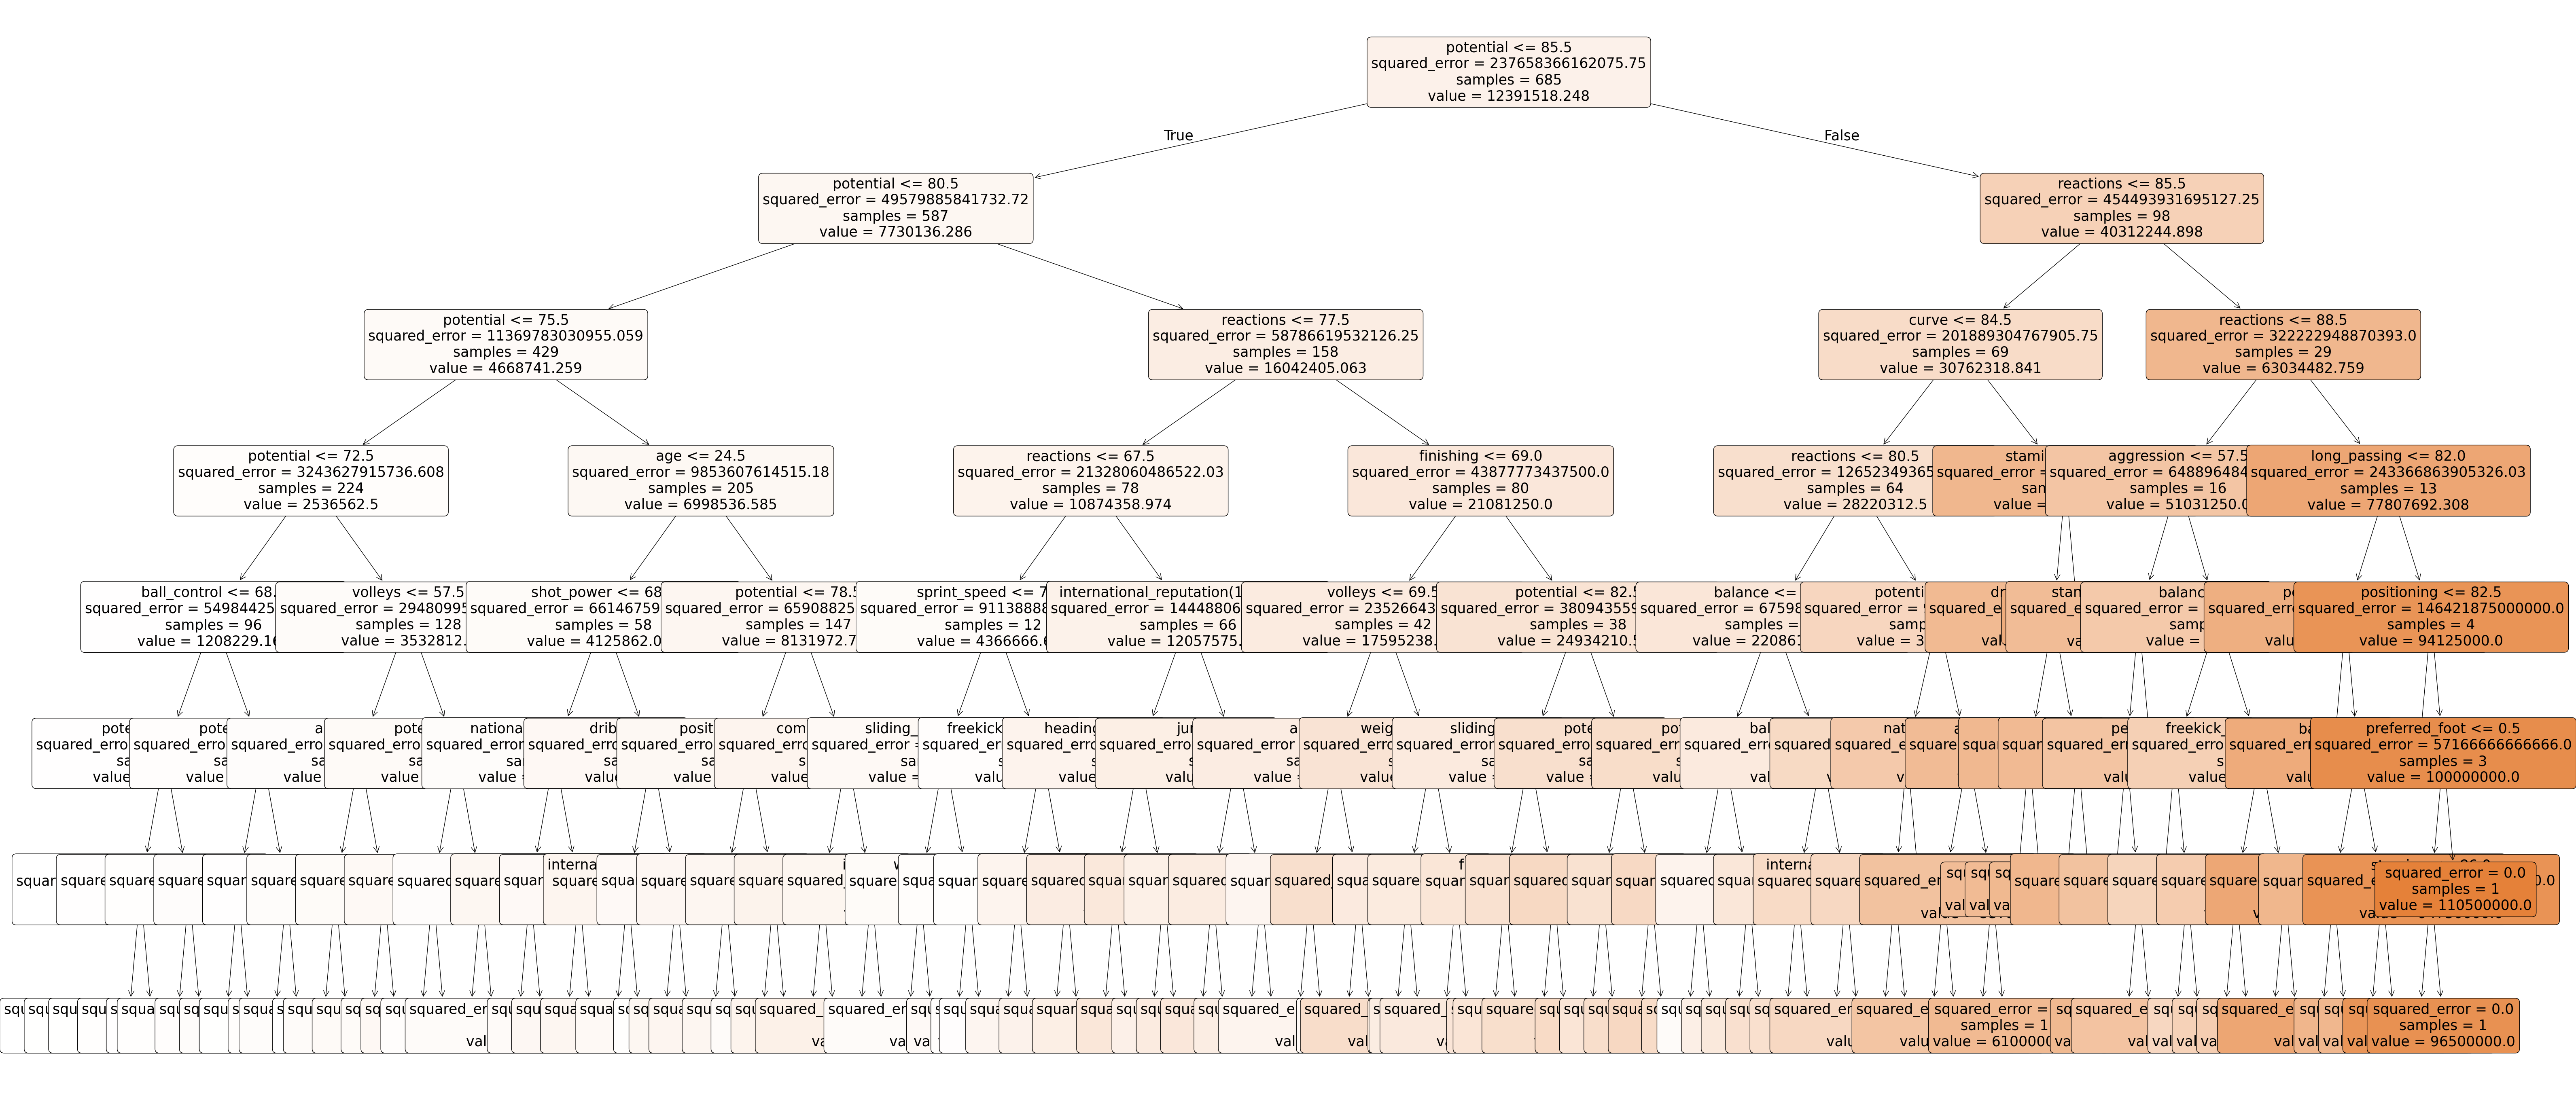

In [404]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(75, 35))
plot_tree(tree, filled=True, rounded=True,feature_names=list(X_train.columns),fontsize=25)
plt.show()

RANDOM FOREST 

In [405]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

Training the model

In [406]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [407]:
pred = forest.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test, y_test))

MAE 2271102.3255813955
RMSE 4709734.310014763
R2 score 0.9315639119290519


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We are now at 0.93 R-Squared.

AdaBoost

In [408]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [410]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [411]:
pred = ada_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test, y_test))

MAE 2450784.88372093
RMSE 5045505.267182147
R2 score 0.9214580484067229


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We are now at 0.92 R-Squared.